# **Group-22 Credit Card Fraud Detection**

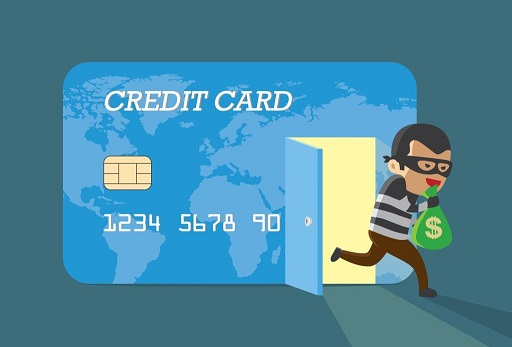



# Phase 2: Implementing Algorithms

# **Team member Details**:

  Dhairya Luthra	2022A7PS1377H

   Animish Agrahari                                                2022A7PS1367H

   B. Vaishnavi                                                    2022A7PS1357H

# **Algorithms implemented**:


1.   Logistic Regression

2.   Support vector Machines

3.   Random Forest Classifier

4.   Isolation Forest

5.   Local Outlier Factor

6.   XGBoost




# Logistic Regression

Logistic regression is a statistical modeling technique employed for binary classification problems. It is a form of supervised learning that utilizes a linear model to estimate the probability of an instance belonging to one of two distinct classes. The target variable in logistic regression is dichotomous, meaning it can take on only two possible values, typically represented as 0 and 1, or true and false.

Logistic regression is particularly useful when the relationship between the predictor variables and the target variable is not necessarily linear, as it models the log odds of the target variable rather than the target variable itself. By estimating these log odds, logistic regression effectively captures the non-linear relationships present in the data.

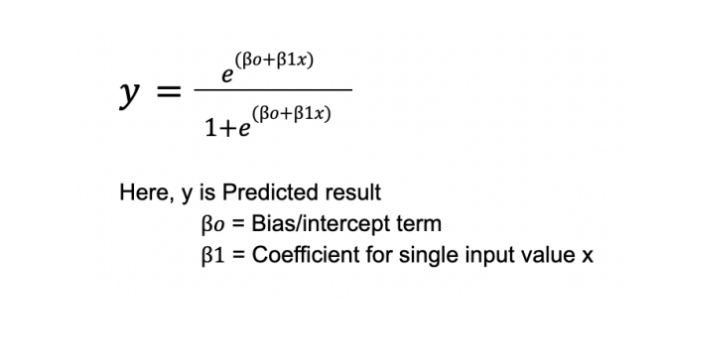


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import sklearn
import numpy as np

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

Importing relevant libraries

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/creditcard.csv')


Importing the data set

In [ ]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Giving an illustration about how unbalanced the dataset is

In [ ]:
print ('Not Fraud % ',round(df['Class'].value_counts()[0]/len(df)*100,2))
print ()
print (round(df.Amount[df.Class == 0].describe(),2))
print ()
print ()
print ('Fraud %    ',round(df['Class'].value_counts()[1]/len(df)*100,2))
print ()
print (round(df.Amount[df.Class == 1].describe(),2))

Not Fraud %  99.83

count    284315.00
mean         88.29
std         250.11
min           0.00
25%           5.65
50%          22.00
75%          77.05
max       25691.16
Name: Amount, dtype: float64


Fraud %     0.17

count     492.00
mean      122.21
std       256.68
min         0.00
25%         1.00
50%         9.25
75%       105.89
max      2125.87
Name: Amount, dtype: float64


Non Fraud %  99.83
Fraud %     0.17


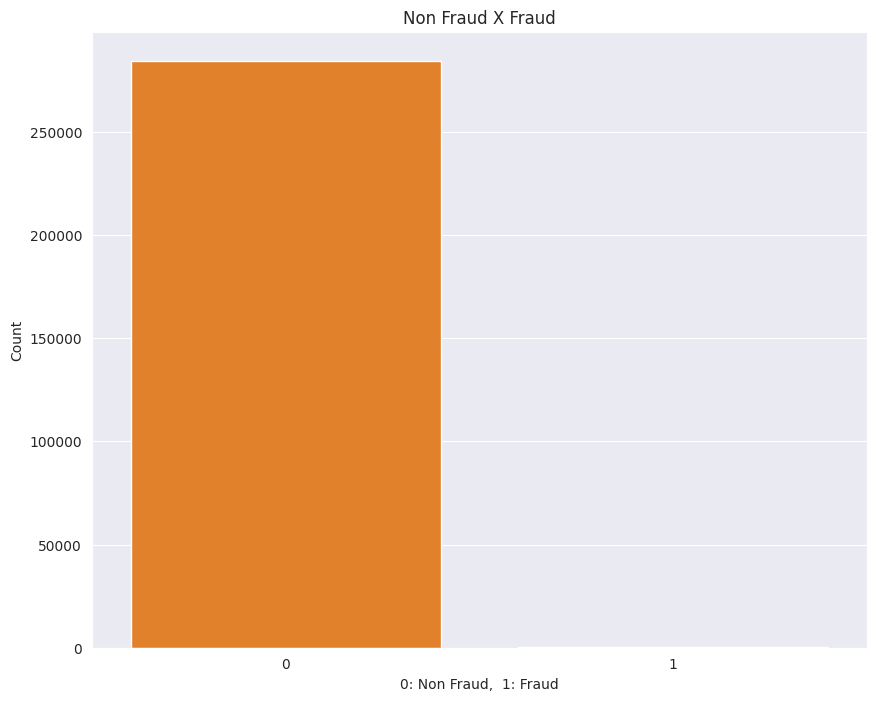

In [ ]:
plt.figure(figsize=(10,8))
sns.set_style('darkgrid')
sns.barplot(x=df['Class'].value_counts().index,y=df['Class'].value_counts(), palette=["C1", "C8"])
plt.title('Non Fraud X Fraud')
plt.ylabel('Count')
plt.xlabel('0: Non Fraud,  1: Fraud')
print ('Non Fraud % ',round(df['Class'].value_counts()[0]/len(df)*100,2))
print ('Fraud %    ',round(df['Class'].value_counts()[1]/len(df)*100,2));

These lines of code separate the DataFrame df into two parts for machine learning tasks: data_features, which contains the columns representing input features, and data_target, which contains the column(s) representing the target variable(s). The first line selects columns 1 through 29 from df and assigns their names to feature_names, while the second line selects columns from the 30th column onwards and assigns their names to target. Subsequently, data_features and data_target are created by filtering df based on the column names stored in feature_names and target, respectively. This process effectively organizes the data for training predictive models, with features separated from the target variable(s).

In [ ]:
feature_names = df.iloc[:, 1:30].columns
target = df.iloc[:1, 30:].columns

data_features = df[feature_names]
data_target = df[target]


These lines utilize scikit-learn's train_test_split function to split the dataset into training and testing sets, with 70% of the data allocated for training (X_train and y_train) and 30% for testing (X_test and y_test). The random_state parameter ensures reproducibility, while np.random.seed(123) sets the random seed for consistent randomization. This separation is crucial for evaluating the model's performance on unseen data and preventing overfitting by validating its generalization ability.

In [ ]:
from sklearn.model_selection import train_test_split
np.random.seed(123)
X_train, X_test, y_train, y_test = train_test_split(data_features, data_target,
                                                    train_size = 0.70, test_size = 0.30, random_state = 1)

In [ ]:
lr.fit(X_train, y_train)

LogisticRegression()

This process involves training the model to learn patterns and relationships in the training data, allowing it to make predictions on new, unseen data.

Confusion Matrix


The provided code defines two functions: PrintStats and RunModel, and then utilizes them to evaluate the performance of a machine learning model (lr) on the test data (X_test, y_test).

In RunModel, the model is trained using the training data (X_train, y_train) and then used to make predictions on the test data (X_test). The confusion matrix is computed to assess the model's performance, and both the confusion matrix and predictions are returned.

The PrintStats function appears to calculate and print various statistics related to the confusion matrix, such as true positives, false negatives, false positives, and true negatives. However, the function does not currently print or return any results.

Additionally, the code imports various functions and libraries for evaluating the model's performance, including accuracy score, classification report, ROC AUC score, ROC curve, and confusion matrix visualization using scikitplot. These metrics and visualizations help in understanding how well the model performs and where it may be making errors


In [ ]:
def PrintStats(cmat, y_test, pred):
    tpos = cmat[0][0]
    fneg = cmat[1][1]
    fpos = cmat[0][1]
    tneg = cmat[1][0]

In [ ]:
def RunModel(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train.values.ravel())
    pred = model.predict(X_test)
    matrix = confusion_matrix(y_test, pred)
    return matrix, pred

In [ ]:
!pip install scikit-plot


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import scikitplot as skplt

In [ ]:
cmat, pred = RunModel(lr, X_train, y_train, X_test, y_test)

The confusion matrix is a table that describes the performance of a classification model. It presents a summary of the predictions made by the model compared to the actual ground truth across different classes. Specifically, it shows the counts of true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN). These metrics help in understanding how well the model is performing in terms of correctly identifying instances of each class and where it might be making errors.

<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

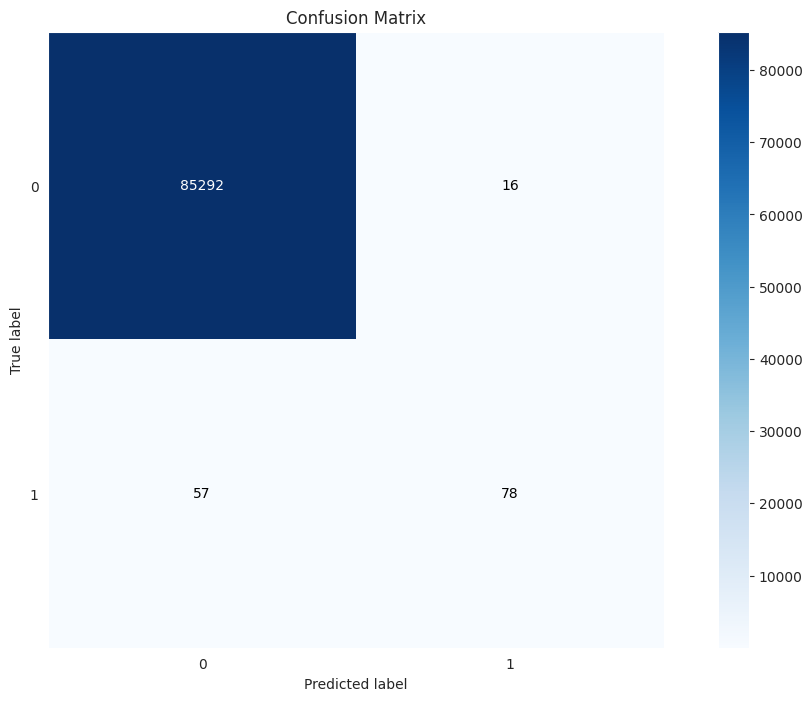

In [ ]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, pred)

In [ ]:
accuracy_score(y_test, pred)

0.9991456292499094

The F1 score is a single metric that combines precision and recall into a single value. It is calculated as the harmonic mean of precision and recall. Precision measures the accuracy of positive predictions, while recall measures the ability of the model to capture all positive instances. The F1 score provides a balance between precision and recall, making it useful for evaluating models when there is an imbalance between the classes or when both false positives and false negatives are important. It ranges from 0 to 1, where higher values indicate better model performance.

In [ ]:
print (classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.83      0.58      0.68       135

    accuracy                           1.00     85443
   macro avg       0.91      0.79      0.84     85443
weighted avg       1.00      1.00      1.00     85443



With the Logistic Regression Model, we have:

85290 transactions classified as normal and were actually normal;

18 transactions classified as fraud but that were really normal (type 1 error);

61 transactions classified as normal but which were fraud (type 2 error);

74 transactions classified as fraud and were actually fraud.

Thus, although the accuracy was excellent, the algorithm wrongly classified about 4 out of 10 fraudulent transactions

Applying the undersampling technique


The provided code snippet addresses the challenge of imbalanced classes in a dataset, particularly in the context of fraud detection. Before executing the code, it's important to acknowledge the disparity between the number of fraud and non-fraud records. To mitigate bias and improve model performance, the code implements a technique called undersampling. This involves randomly selecting a subset of the majority class (non-fraud records) to match the size of the minority class (fraud records). By doing so, it creates a balanced dataset where both classes are represented equally. The code then proceeds to split this balanced dataset into training and testing sets (X_undersampled_train, X_undersampled_test, Y_undersampled_train, Y_undersampled_test) for further model training and evaluation. This approach aims to address the challenge of imbalanced classes and enhance the model's ability to detect fraudulent transactions effectively.

In [ ]:
fraud_records = len(df[df.Class == 1])

# Defines the index for fraud and non-fraud in the lines:
fraud_indices = df[df.Class == 1].index
not_fraud_indices = df[df.Class == 0].index

# Randomly collect equal samples of each type:
under_sample_indices = np.random.choice(not_fraud_indices, fraud_records, False)
df_undersampled = df.iloc[np.concatenate([fraud_indices, under_sample_indices]),:]
X_undersampled = df_undersampled.iloc[:,1:30]
Y_undersampled = df_undersampled.Class
X_undersampled_train, X_undersampled_test, Y_undersampled_train, Y_undersampled_test = train_test_split(X_undersampled, Y_undersampled, test_size = 0.30)

In [ ]:
lr_undersampled = LogisticRegression()
cmat, pred = RunModel(lr_undersampled, X_undersampled_train, Y_undersampled_train, X_undersampled_test, Y_undersampled_test)
PrintStats(cmat, Y_undersampled_test, pred)

<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

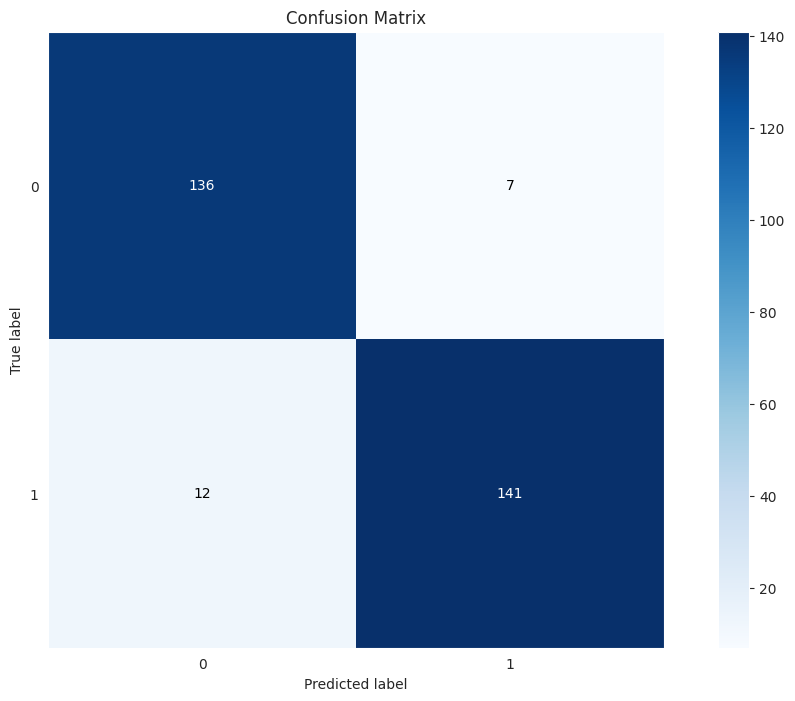

In [ ]:
skplt.metrics.plot_confusion_matrix(Y_undersampled_test, pred)

In [ ]:
accuracy_score(Y_undersampled_test, pred)

0.9358108108108109

In [ ]:
print (classification_report(Y_undersampled_test, pred))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93       143
           1       0.95      0.92      0.94       153

    accuracy                           0.94       296
   macro avg       0.94      0.94      0.94       296
weighted avg       0.94      0.94      0.94       296



In [ ]:
lr_undersampled = LogisticRegression()
cmat, pred = RunModel(lr_undersampled, X_undersampled_train, Y_undersampled_train, X_test, y_test)
PrintStats(cmat, y_test, pred)

<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

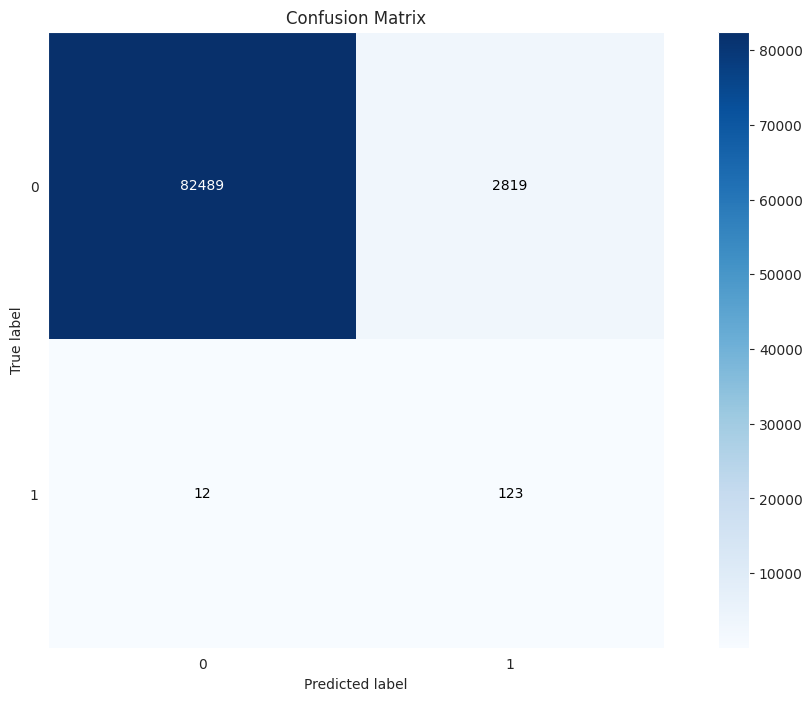

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test, pred)

In [ ]:
accuracy_score(y_test, pred)

0.9668668000889482

In [ ]:
print (classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     85308
           1       0.04      0.91      0.08       135

    accuracy                           0.97     85443
   macro avg       0.52      0.94      0.53     85443
weighted avg       1.00      0.97      0.98     85443



The Receiver Operating Characteristic (ROC) curve is a graphical representation that illustrates the performance of a binary classification model across various threshold settings. It plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at different classification thresholds.

The True Positive Rate (TPR), also known as sensitivity or recall, represents the proportion of actual positive instances correctly classified as positive by the model. On the other hand, the False Positive Rate (FPR) measures the proportion of actual negative instances incorrectly classified as positive.

The Area Under the ROC Curve (AUC) is a single scalar value that quantifies the overall performance of the classification model. A higher AUC value indicates better discrimination ability of the model, where it can distinguish between positive and negative instances more effectively across various threshold settings.

Interpretation of the ROC AUC value:

AUC = 1: Perfect classifier that separates all positive and negative instances perfectly.
AUC = 0.5: Random classifier that performs no better than chance.
AUC > 0.5 and < 1: Better than random, with higher values indicating better performance.
In summary, the ROC AUC curve and metric provide valuable insights into the trade-off between sensitivity and specificity of a classification model. It helps in comparing different models, selecting the optimal threshold for decision making, and understanding the model's overall performance in distinguishing between classes.

The provided code snippet trains a logistic regression classifier (clf) on the undersampled training data (X_undersampled_train, Y_undersampled_train). Then, it predicts the labels for the test data (X_test) and computes the predicted probabilities for class 1 (fraud) using predict_proba.

Next, it calculates the False Positive Rate (FPR) and True Positive Rate (TPR) using metrics.roc_curve based on the predicted probabilities and the actual labels of the test data (y_test). The area under the ROC curve (AUC) is then computed using metrics.roc_auc_score.

Finally, it plots the ROC curve using Matplotlib, with the FPR on the x-axis and the TPR on the y-axis, and includes the AUC value in the legend. This visual representation helps assess the performance of the logistic regression model in distinguishing between the classes, with a higher AUC indicating better performance.







In [ ]:
from sklearn import metrics

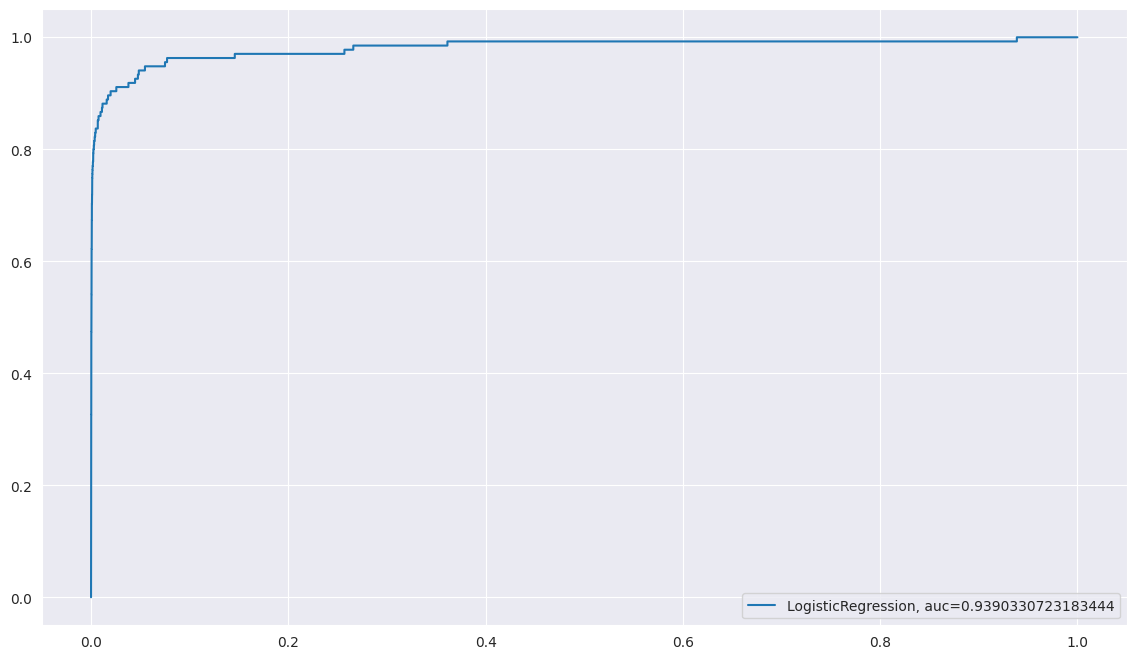

In [ ]:
clf = LogisticRegression(C=1, penalty='l2')
clf.fit(X_undersampled_train, Y_undersampled_train)
y_pred = clf.predict(X_test)

y_pred_probability = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_probability)
auc = metrics.roc_auc_score(y_test, pred)
plt.plot(fpr,tpr,label="LogisticRegression, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Support Vector Classifier

In the context of outlier detection, Support Vector Machines (SVMs) can be employed as a powerful technique for identifying anomalous data points or observations that deviate significantly from the normal patterns within a dataset.

The basic principle behind using SVMs for outlier detection is to treat the problem as a semi-supervised learning task, where the majority of the data is assumed to be normal, and the goal is to identify the few outlying instances. SVMs achieve this by constructing a decision boundary that separates the inliers (normal data points) from the outliers, maximizing the margin between these two groups.

The process involves training an SVM model on the available data, treating all instances as belonging to the normal class. By leveraging the maximum margin principle, the SVM aims to find the hyperplane that best separates the majority of the data from the origin or a predetermined outlier region in the feature space.

Once the SVM model is trained, new instances can be evaluated based on their position relative to the decision boundary. Data points that fall within the learned boundary are classified as inliers, while those that lie beyond the boundary are identified as potential outliers.

One of the advantages of using SVMs for outlier detection is their ability to handle high-dimensional and non-linear data. By employing appropriate kernel functions, SVMs can effectively map the data into a higher-dimensional space, where the separation between inliers and outliers becomes more apparent and linear




In [ ]:
import pandas as pd
import numpy as np

# Scikit-learn library: For SVM
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn import svm

import itertools

# Matplotlib library to plot the charts
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

# Library for the statistic data vizualisation
import seaborn

%matplotlib inline

importing relevant libraries

In [ ]:
data= "/content/drive/MyDrive/creditcard.csv"
df = pd.read_csv(data)

creates a scatter plot that displays the amounts of fraudulent transactions over time. The x-axis represents the time at which the transactions occurred, while the y-axis represents the corresponding transaction amounts. By focusing on fraudulent transactions, this visualization offers insights into potential patterns or trends in fraudulent activity over time. The plot is constrained to specific ranges on both axes (Time and Amount) to ensure a clear and focused display of the data. This visualization can aid in understanding the distribution and potential temporal variations in fraudulent transaction amounts, which may inform strategies for fraud detection and prevention.

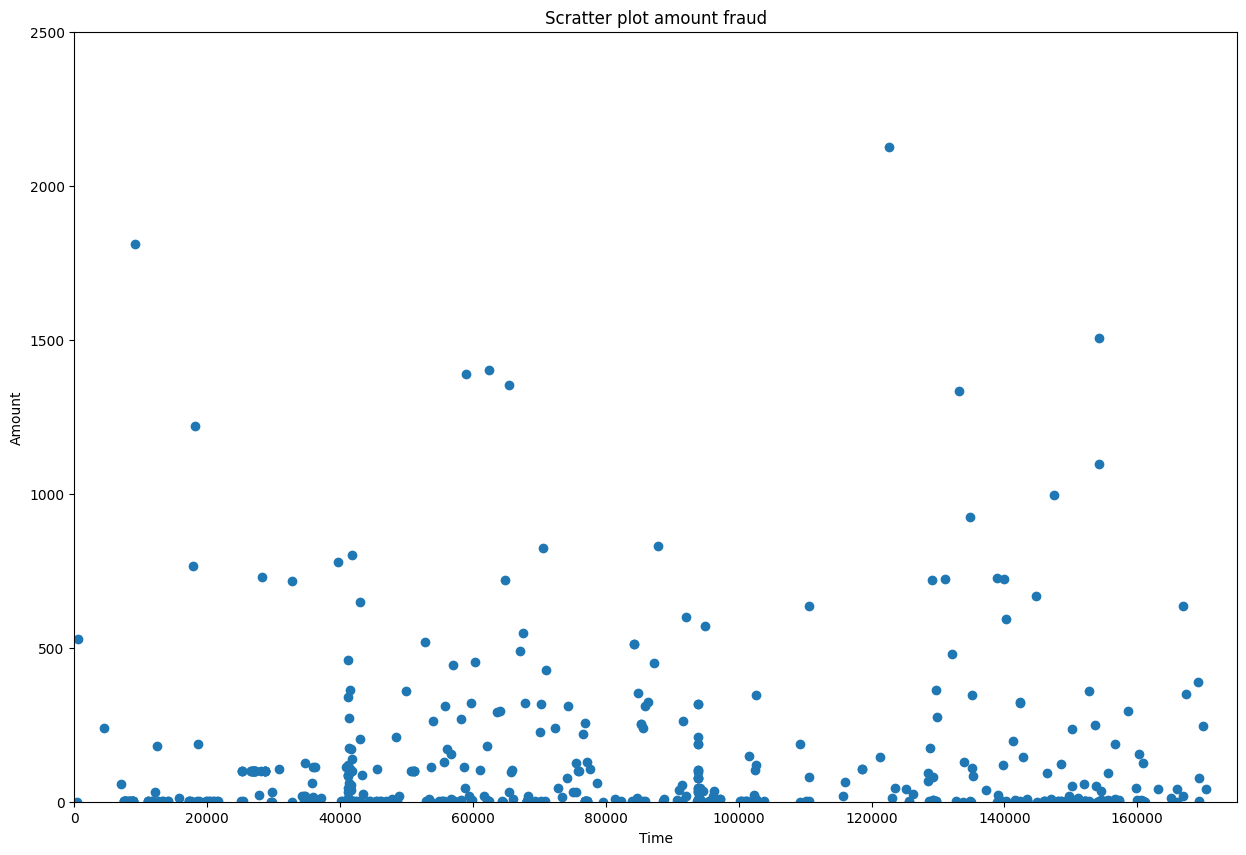

In [ ]:
df_fraud = df[df['Class'] == 1] # Recovery of fraud data
plt.figure(figsize=(15,10))
plt.scatter(df_fraud['Time'], df_fraud['Amount']) # Display fraud amounts according to their time
plt.title('Scratter plot amount fraud')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.xlim([0,175000])
plt.ylim([0,2500])
plt.show()

In [ ]:
nb_big_fraud = df_fraud[df_fraud['Amount'] > 1000].shape[0] # Recovery of frauds over 1000
print('There are only '+ str(nb_big_fraud) + ' frauds where the amount was bigger than 1000 over ' + str(df_fraud.shape[0]) + ' frauds')

There are only 9 frauds where the amount was bigger than 1000 over 492 frauds


In [ ]:

data = pd.read_csv('/content/drive/MyDrive/creditcard.csv')import pandas as pd



In [ ]:
number_fraud = len(data[data['Class'] == 1])
number_no_fraud = len(data[data['Class'] == 0])
print('There are only ' + str(number_fraud) + ' frauds in the original dataset, even though there are ' + str(number_no_fraud) + ' non-frauds in the dataset.')


There are only 492 frauds in the original dataset, even though there are 284315 non-frauds in the dataset.


In [ ]:
print("The accuracy of the classifier then would be : "+ str((284315-492)/284315)+ " which is the number of good classification over the number of tuple to classify")

The accuracy of the classifier then would be : 0.998269524998681 which is the number of good classification over the number of tuple to classify


In [ ]:

df_corr = df.c= df.corr()

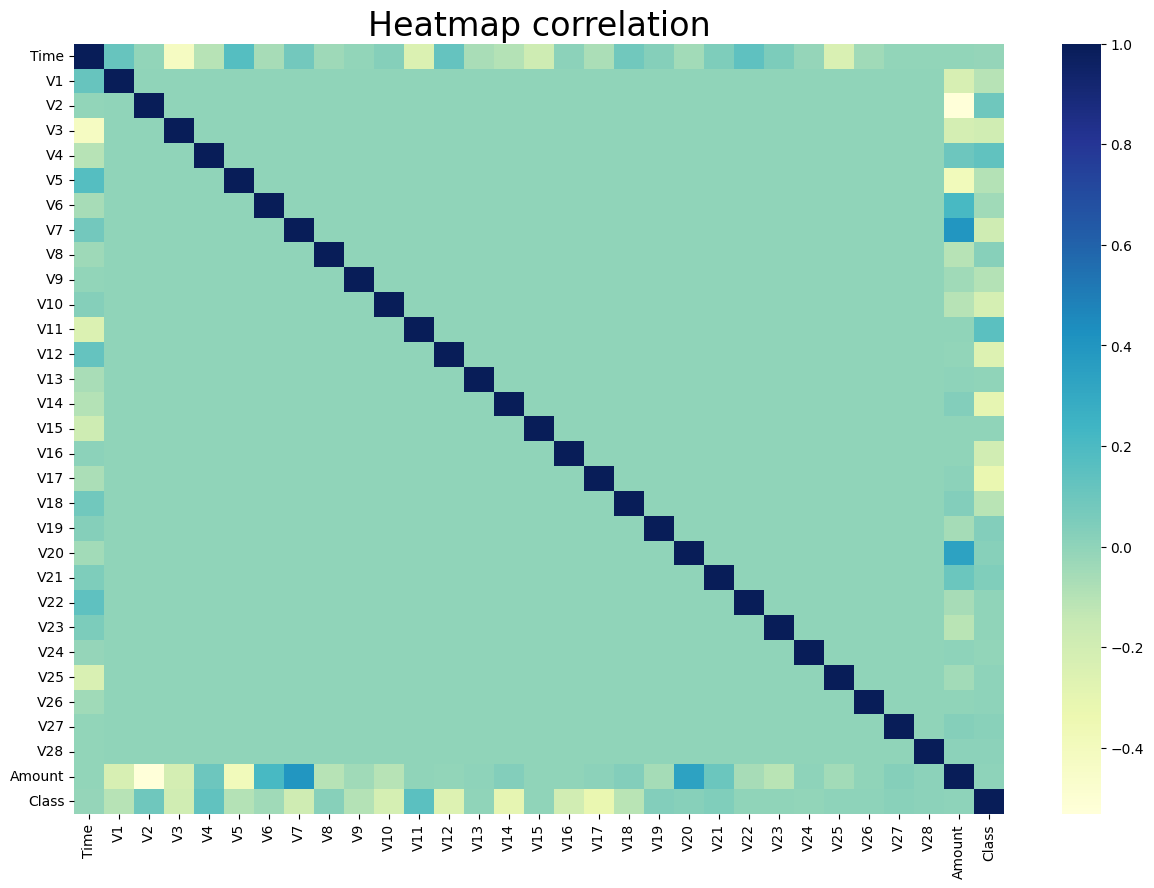

In [ ]:
plt.figure(figsize=(15,10))
seaborn.heatmap(df_corr, cmap="YlGnBu") # Displaying the Heatmap
seaborn.set(font_scale=2,style='white')

plt.title('Heatmap correlation')
plt.show()

code snippet calculates and ranks the correlation coefficients between each feature and the target variable 'Class' in the DataFrame df. It begins by retrieving the correlation coefficients and storing them in the variable rank. Then, it creates a DataFrame df_rank to store these coefficients along with their absolute values, sorted in descending order. This process is crucial for identifying the features that exhibit the strongest correlation (either positive or negative) with the target variable 'Class'. By focusing on the absolute values, the code ensures that both positive and negative correlations are considered equally in the ranking. The resulting DataFrame df_rank provides valuable insights into feature importance, which can guide feature selection or preprocessing steps before performing support vector machine (SVM) modeling. This ranking can help identify the most relevant features for training an effective SVM classifier.

In [ ]:
rank = df_corr['Class'] # Retrieving the correlation coefficients per feature in relation to the feature class
df_rank = pd.DataFrame(rank)
df_rank = np.abs(df_rank).sort_values(by='Class',ascending=False) # Ranking the absolute values of the coefficients
                                                                  # in descending order
df_rank.dropna(inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming df_train contains all your training data including features and target
X_train = df_train.drop(['Time', 'Class'], axis=1)
y_train = df_train['Class']

X_train = np.asarray(X_train)
y_train = np.asarray(y_train)


Undersampling

In [ ]:
import pandas as pd

# Assuming df_train_all is your original DataFrame
df_train_all = df[0:150000]

# Separate frauds and non-frauds
df_train_1 = df_train_all[df_train_all['Class'] == 1]
df_train_0 = df_train_all[df_train_all['Class'] == 0]

# Print the number of frauds
print('In this dataset, we have ' + str(len(df_train_1)) + ' frauds.')

# Sample an equal number of non-frauds
num_frauds = len(df_train_1)
df_sample = df_train_0.sample(num_frauds)  # Sample an equal number of non-frauds

# Concatenate frauds and sampled non-frauds
df_train = pd.concat([df_train_1, df_sample])

# Shuffle the combined DataFrame
df_train = df_train.sample(frac=1).reset_index(drop=True)

# Now df_train contains a balanced dataset with equal number of frauds and non-frauds


In this dataset, we have 293 frauds.


In [ ]:
df_test_all = df[150000:]

X_test_all = df_test_all.drop(['Time', 'Class'],axis=1)
y_test_all = df_test_all['Class']
X_test_all = np.asarray(X_test_all)
y_test_all = np.asarray(y_test_all)

In [ ]:
X_train_rank = df_train[df_rank.index[1:11]] # We take the first ten ranked features
X_train_rank = np.asarray(X_train_rank)

In [ ]:
X_test_all_rank = df_test_all[df_rank.index[1:11]]
X_test_all_rank = np.asarray(X_test_all_rank)
y_test_all = np.asarray(y_test_all)

In [ ]:
class_names=np.array(['0','1'])

In [ ]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Now we will use svm model selection

In [ ]:
classifier = svm.SVC(kernel='linear')

In [ ]:
classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
prediction_SVM_all = classifier.predict(X_test_all)

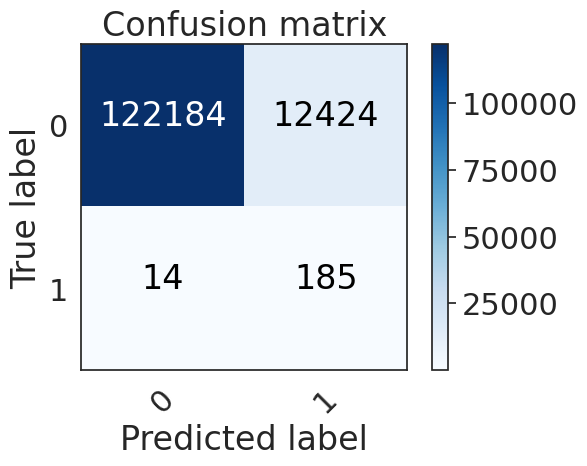

In [ ]:
cm = confusion_matrix(y_test_all, prediction_SVM_all)
plot_confusion_matrix(cm,class_names)

In [ ]:
print('Our criterion give a result of '
      + str( ( (cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1])) + 4 * cm[1][1]/(cm[1][0]+cm[1][1])) / 5))

Our criterion give a result of 0.9252655452744223


In [ ]:
print('We have detected ' + str(cm[1][1]) + ' frauds / ' + str(cm[1][1]+cm[1][0]) + ' total frauds.')
print('\nSo, the probability to detect a fraud is ' + str(cm[1][1]/(cm[1][1]+cm[1][0])))
print("the accuracy is : "+str((cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1]))))

We have detected 185 frauds / 199 total frauds.

So, the probability to detect a fraud is 0.9296482412060302
the accuracy is : 0.9077347615479908


Model Rank
###There is a need to compute the fit method again, as the dimension of the tuples to predict went from 29 to 10 because of the dimension reduction

In [ ]:
classifier.fit(X_train_rank, y_train) # Then we train our model, with our balanced data train.
prediction_SVM = classifier.predict(X_test_all_rank)

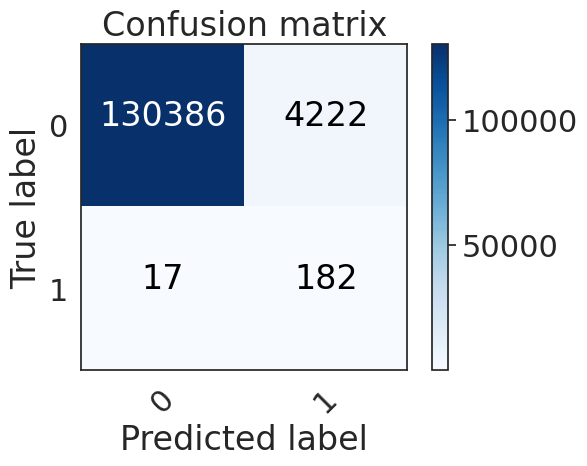

In [ ]:
cm = confusion_matrix(y_test_all, prediction_SVM)
plot_confusion_matrix(cm,class_names)

In [ ]:
print('Our criterion give a result of '
      + str( ( (cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1])) + 4 * cm[1][1]/(cm[1][0]+cm[1][1])) / 5))

Our criterion give a result of 0.9253693005295156


Testing the mode

In [ ]:
prediction_SVM_all = classifier.predict(X_test_all)

In [ ]:
cm = confusion_matrix(y_test_all, prediction_SVM_all)
plot_confusion_matrix(cm,class_names)

In [ ]:
print('Our criterion give a result of '
      + str( ( (cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1])) + 4 * cm[1][1]/(cm[1][0]+cm[1][1])) / 5))

In [ ]:
print('We have detected ' + str(cm[1][1]) + ' frauds / ' + str(cm[1][1]+cm[1][0]) + ' total frauds.')
print('\nSo, the probability to detect a fraud is ' + str(cm[1][1]/(cm[1][1]+cm[1][0])))
print("the accuracy is : "+str((cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1]))))

Model Rank
######There is a need to compute the fit method again, as the dimension of the tuples to predict went from 29 to 10 because of the dimension reduction

In [ ]:
classifier.fit(X_train_rank, y_train) # Then we train our model, with our balanced data train.
prediction_SVM = classifier.predict(X_test_all_rank) #And finally, we predict our data test.

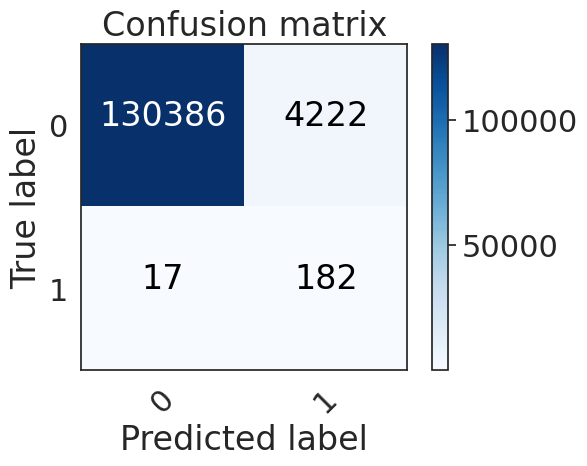

In [ ]:
cm = confusion_matrix(y_test_all, prediction_SVM)
plot_confusion_matrix(cm,class_names)

In [ ]:
print('Our criterion give a result of '
      + str( ( (cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1])) + 4 * cm[1][1]/(cm[1][0]+cm[1][1])) / 5))

Our criterion give a result of 0.9253693005295156


In [ ]:
print('We have detected ' + str(cm[1][1]) + ' frauds / ' + str(cm[1][1]+cm[1][0]) + ' total frauds.')
print('\nSo, the probability to detect a fraud is ' + str(cm[1][1]/(cm[1][1]+cm[1][0])))
print("the accuracy is : "+str((cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1]))))

We have detected 182 frauds / 199 total frauds.

So, the probability to detect a fraud is 0.914572864321608
the accuracy is : 0.9685550453611459


We can see that the study using the reduced data is far from unrelevant, which means that the last step of the previously computed PCA could have been done in a more efficient way. Indeed one of the main question we have with the PCA once we calculated the principals components direction, is how many of this component are we gonna keep. This means that some of the 30 dimensions are do not discriminate classes that much.

Re-balanced class weigh

In [ ]:
classifier_b = svm.SVC(kernel='linear',class_weight={0:0.60, 1:0.40})

In [ ]:
classifier_b.fit(X_train, y_train)

SVC(class_weight={0: 0.6, 1: 0.4}, kernel='linear')

In [ ]:
prediction_SVM_b_all = classifier_b.predict(X_test_all)

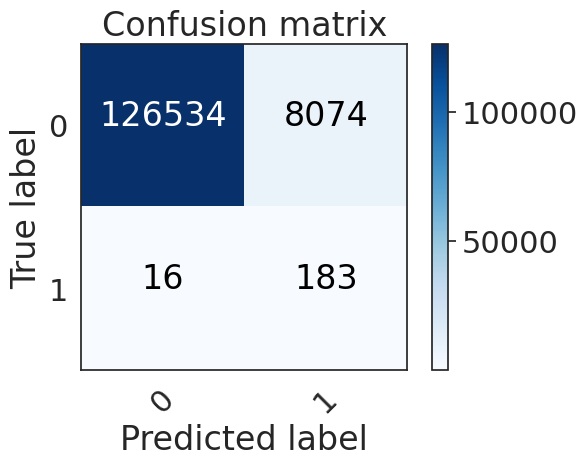

In [ ]:
cm = confusion_matrix(y_test_all, prediction_SVM_b_all)
plot_confusion_matrix(cm,class_names)

In [ ]:
print('Our criterion give a result of '
      + str( ( (cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1])) + 4 * cm[1][1]/(cm[1][0]+cm[1][1])) / 5))

Our criterion give a result of 0.923676047867875


In [ ]:
print('We have detected ' + str(cm[1][1]) + ' frauds / ' + str(cm[1][1]+cm[1][0]) + ' total frauds.')
print('\nSo, the probability to detect a fraud is ' + str(cm[1][1]/(cm[1][1]+cm[1][0])))
print("the accuracy is : "+str((cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1]))))

We have detected 183 frauds / 199 total frauds.

So, the probability to detect a fraud is 0.9195979899497487
the accuracy is : 0.93998827954038


Model Rank

In [ ]:
classifier_b.fit(X_train_rank, y_train) # Then we train our model, with our balanced data train.
prediction_SVM = classifier_b.predict(X_test_all_rank)

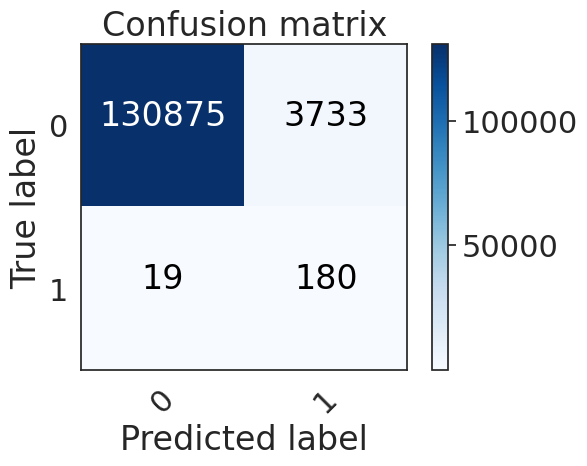

In [ ]:
cm = confusion_matrix(y_test_all, prediction_SVM)
plot_confusion_matrix(cm,class_names)

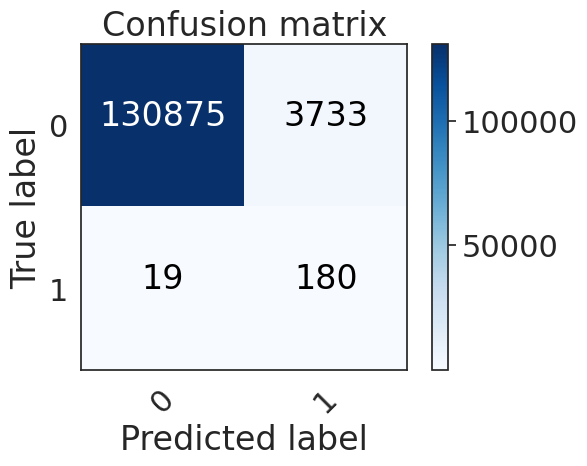

In [ ]:
cm = confusion_matrix(y_test_all, prediction_SVM)
plot_confusion_matrix(cm,class_names)

In [ ]:
print('We have detected ' + str(cm[1][1]) + ' frauds / ' + str(cm[1][1]+cm[1][0]) + ' total frauds.')
print('\nSo, the probability to detect a fraud is ' + str(cm[1][1]/(cm[1][1]+cm[1][0])))
print("the accuracy is : "+str((cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1]))))

We have detected 180 frauds / 199 total frauds.

So, the probability to detect a fraud is 0.9045226130653267
the accuracy is : 0.9721676174085916


# Random Forest Classifier

The Random Forest algorithm is a supervised machine learning technique that combines multiple decision trees, each trained on a random subset of the features and data instances. This ensemble approach helps mitigate the high variance and overfitting issues commonly encountered with individual decision trees, resulting in improved accuracy and robustness.

When applied to outlier detection, the Random Forest algorithm leverages its ability to capture complex patterns and interactions within the data. Each decision tree in the ensemble contributes to the identification of potential outliers by analyzing the data from different perspectives, considering various combinations of features and samples.


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:

from sklearn.datasets import make_classification
import numpy as np

In [ ]:
X, Y = make_classification(n_samples=2000, n_classes=2, n_features=10, random_state=0)


In [ ]:
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2,
                                                    random_state=0)

In [ ]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB


The provided code snippet initializes a Random Forest classifier (rf) with specified parameters, including the maximum number of features considered for splitting each node (max_features) and the number of decision trees in the ensemble (n_estimators). Then, it trains the Random Forest classifier using the training data (X_train, Y_train). Random Forest is an ensemble learning method that builds multiple decision trees during training and combines their predictions to improve overall accuracy and robustness. By utilizing a large number of decision trees (500 in this case) and considering a limited number of features for each split (5 in this case), Random Forest can effectively capture complex relationships and patterns in the data while mitigating overfitting. This approach is widely used for classification tasks due to its high predictive performance and versatility across various domains.

In [ ]:
rf = RandomForestClassifier(max_features=5, n_estimators=500)
rf.fit(X_train, Y_train)

RandomForestClassifier(max_features=5, n_estimators=500)

In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Generate synthetic classification data
X, y = make_classification(n_samples=2000, n_classes=2, n_features=10, random_state=0)
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize and train RandomForestClassifier
rf = RandomForestClassifier(max_features=5, n_estimators=500, random_state=0)
rf.fit(X_train, y_train)

# Example usage of trained RandomForestClassifier
# Make predictions on the test set
y_pred = rf.predict(X_test)

# Evaluate classifier performance
accuracy = np.mean(y_pred == y_test)
print("Accuracy:", accuracy)


Accuracy: 0.855


In [ ]:
nb = GaussianNB()
nb.fit(X_train, Y_train)

GaussianNB()

In [ ]:
GaussianNB(priors=None, var_smoothing=1e-09)

GaussianNB()

In [ ]:
r_probs = [0 for _ in range(len(Y_test))]
rf_probs = rf.predict_proba(X_test)
nb_probs = nb.predict_proba(X_test)

In [ ]:
rf_probs = rf_probs[:, 1]
nb_probs = nb_probs[:, 1]

In [ ]:
r_auc = roc_auc_score(Y_test, r_probs)
rf_auc = roc_auc_score(Y_test, rf_probs)
nb_auc = roc_auc_score(Y_test, nb_probs)

In [ ]:
print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('Random Forest: AUROC = %.3f' % (rf_auc))
print('Naive Bayes: AUROC = %.3f' % (nb_auc))

Random (chance) Prediction: AUROC = 0.500
Random Forest: AUROC = 0.909
Naive Bayes: AUROC = 0.993


In [ ]:

r_fpr, r_tpr, _ = roc_curve(Y_test, r_probs)
rf_fpr, rf_tpr, _ = roc_curve(Y_test, rf_probs)
nb_fpr, nb_tpr, _ = roc_curve(Y_test, nb_probs)

In [ ]:
import matplotlib.pyplot as plt

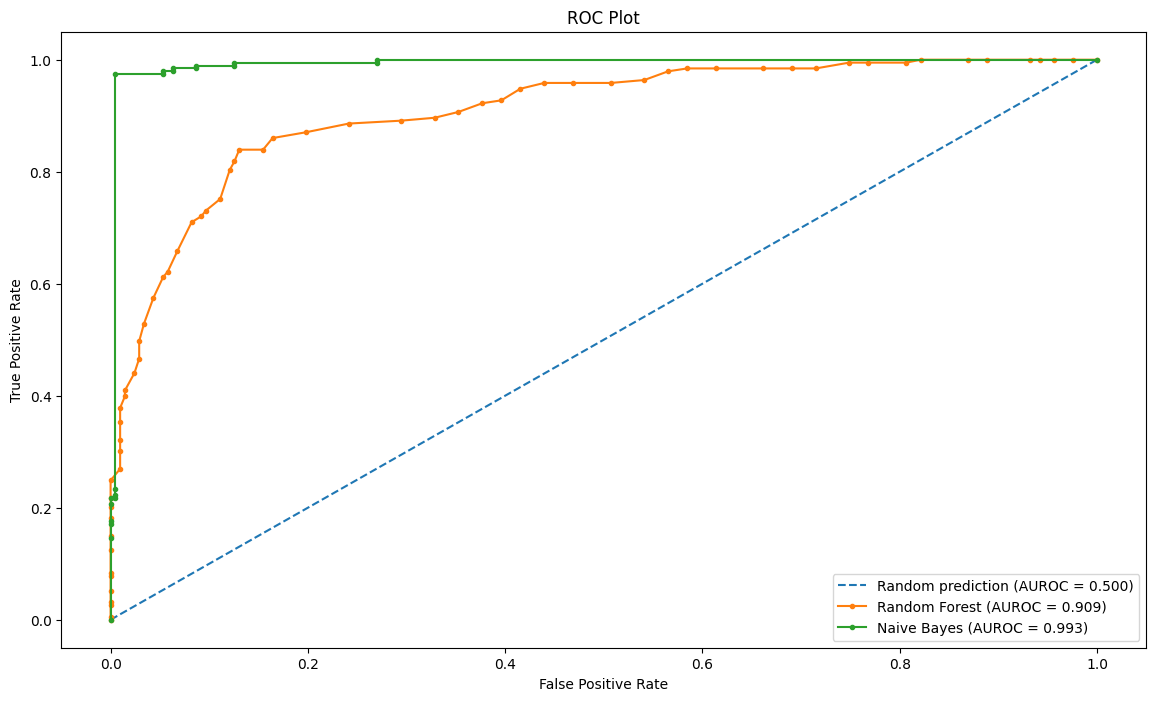

In [ ]:

plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)
plt.plot(nb_fpr, nb_tpr, marker='.', label='Naive Bayes (AUROC = %0.3f)' % nb_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() #
# Show plot
plt.show()

# Isolation Forest
Isolation Forests is an unsupervised machine learning algorithm specifically designed for anomaly or outlier detection. It is based on the principle of isolating anomalies rather than profiling normal instances. The algorithm works by recursively partitioning the data space into smaller subspaces, where anomalies are expected to be isolated sooner than normal instances.

The key idea behind Isolation Forests is that anomalies are few and different from the majority of the data. Therefore, they are more susceptible to being isolated or separated from the rest of the data points during the partitioning process. The algorithm works as follows:

Tree Construction: Isolation Forests build an ensemble of isolation trees, which are binary trees constructed by recursively partitioning the data space. Each tree is built independently on a random subsample of the data.

Recursive Partitioning: At each node of the tree, a random feature and a random split value are selected to partition the data space into two subspaces. The partitioning process continues recursively until all instances are isolated or a maximum tree depth is reached.

Path Length Calculation: For each instance in the dataset, the path length (the number of edges traversed from the root to the terminating node) is calculated across all trees in the ensemble. Anomalies are expected to have shorter path lengths compared to normal instances because they are isolated earlier in the partitioning process.

Anomaly Score Computation: The anomaly score for each instance is computed based on the average path length across all trees in the ensemble. Instances with shorter average path lengths are considered more likely to be anomalies.

Outlier Identification: A threshold is set to determine the cutoff for classifying instances as outliers or inliers based on their anomaly scores. Instances with anomaly scores above the threshold are labeled as outliers, while those below the threshold are considered normal.






# Local Outlier Factor
Local outlier factor (LOF) is an algorithm used for Unsupervised outlier detection. It produces an anomaly score that represents data points which are outliers in the data set. It does this by measuring the local density deviation of a given data point with respect to the data points near it. Working of LOF: Local density is determined by estimating distances between data points that are neighbors (k-nearest neighbors). So for each data point, local density can be calculated. By comparing these we can check which data points have similar densities and which have a lesser density than its neighbors. The ones with the lesser densities are considered as the outliers. Firstly, k-distances are distances between points that are calculated for each point to determine their k-nearest neighbors. The 2nd closest point is said to be the 2nd nearest neighbor to the point. Here is an image which represents k-distances of various neighbors in the cluster of a point:
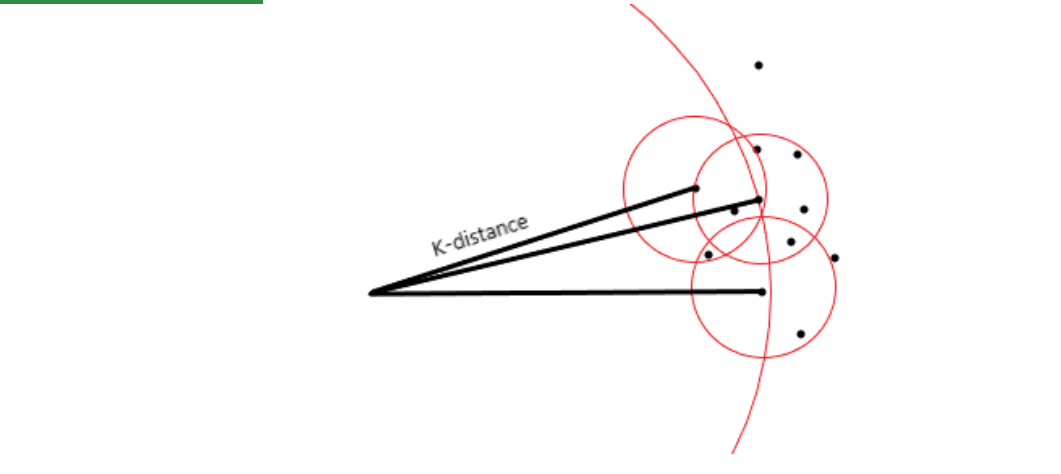


This distance is used to calculate the reachability distance. It is defined as the maximum of the distance between two points and the k-distance of that point.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
data= "/content/drive/MyDrive/creditcard.csv"
df = pd.read_csv(data)

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
import pandas as pd


Fraud = data[data['Class'] == 1]
Normal = data[data['Class'] == 0]

In [ ]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
data.isnull().values.any()

False

Text(0, 0.5, 'Frequency')

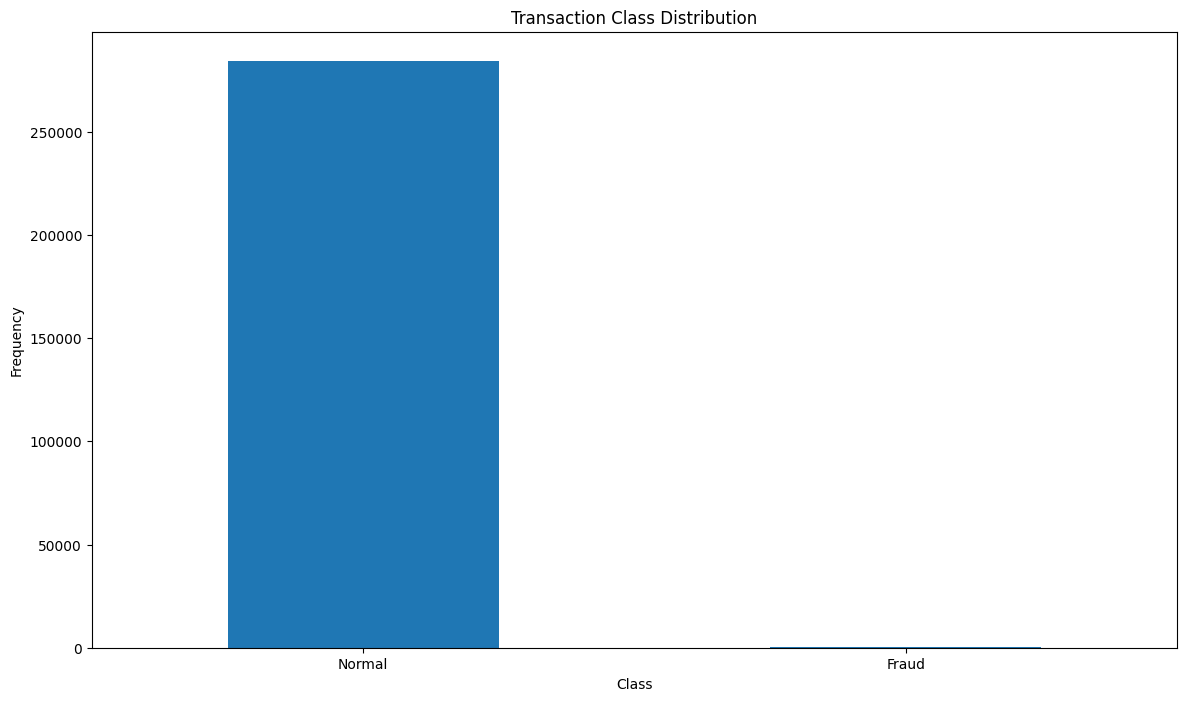

In [ ]:
count_classes = pd.value_counts(data['Class'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Transaction Class Distribution")

plt.xticks(range(2), LABELS)

plt.xlabel("Class")

plt.ylabel("Frequency")

In [ ]:
fraud = data[data['Class']==1]

normal = data[data['Class']==0]

In [ ]:
print(fraud.shape,normal.shape)

(492, 31) (284315, 31)


In [ ]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [ ]:
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

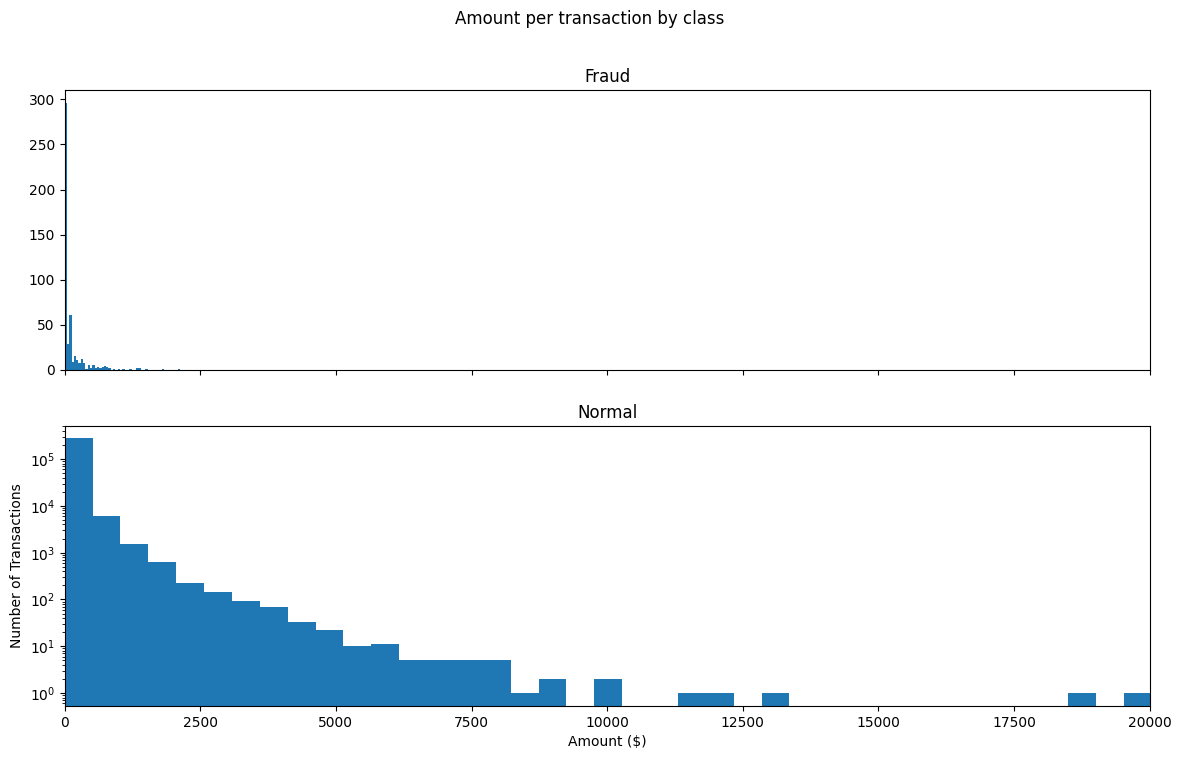

In [ ]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(normal.Amount, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

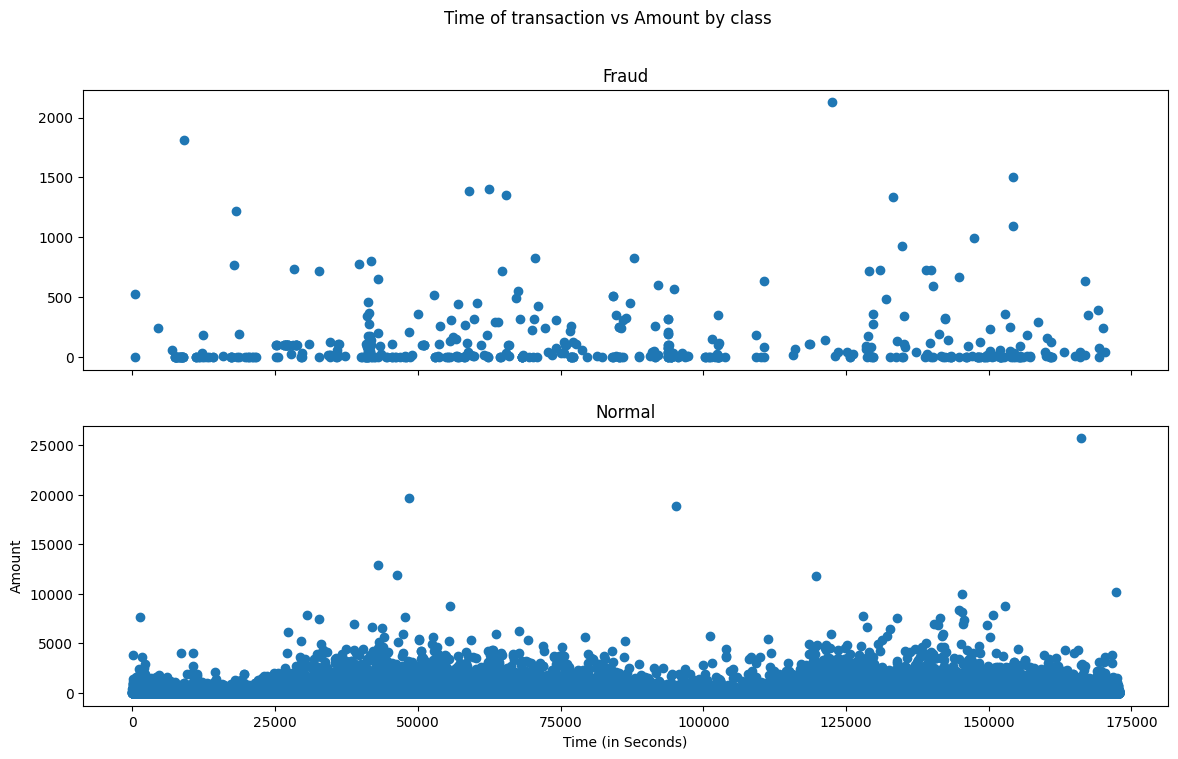

In [ ]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')

ax1.scatter(Fraud['Time'], Fraud['Amount'])
ax1.set_title('Fraud')

ax2.scatter(Normal['Time'], Normal['Amount'])
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

In [ ]:
data1= data.sample(frac = 0.1,random_state=1)

data1.shape

(28481, 31)

In [ ]:
data.shape

(284807, 31)

In [ ]:
Fraud = data1[data1['Class']==1]

Valid = data1[data1['Class']==0]

outlier_fraction = len(Fraud)/float(len(Valid))

In [ ]:
print(outlier_fraction)

print("Fraud Cases : {}".format(len(Fraud)))

print("Valid Cases : {}".format(len(Valid)))

0.0017234102419808666
Fraud Cases : 49
Valid Cases : 28432


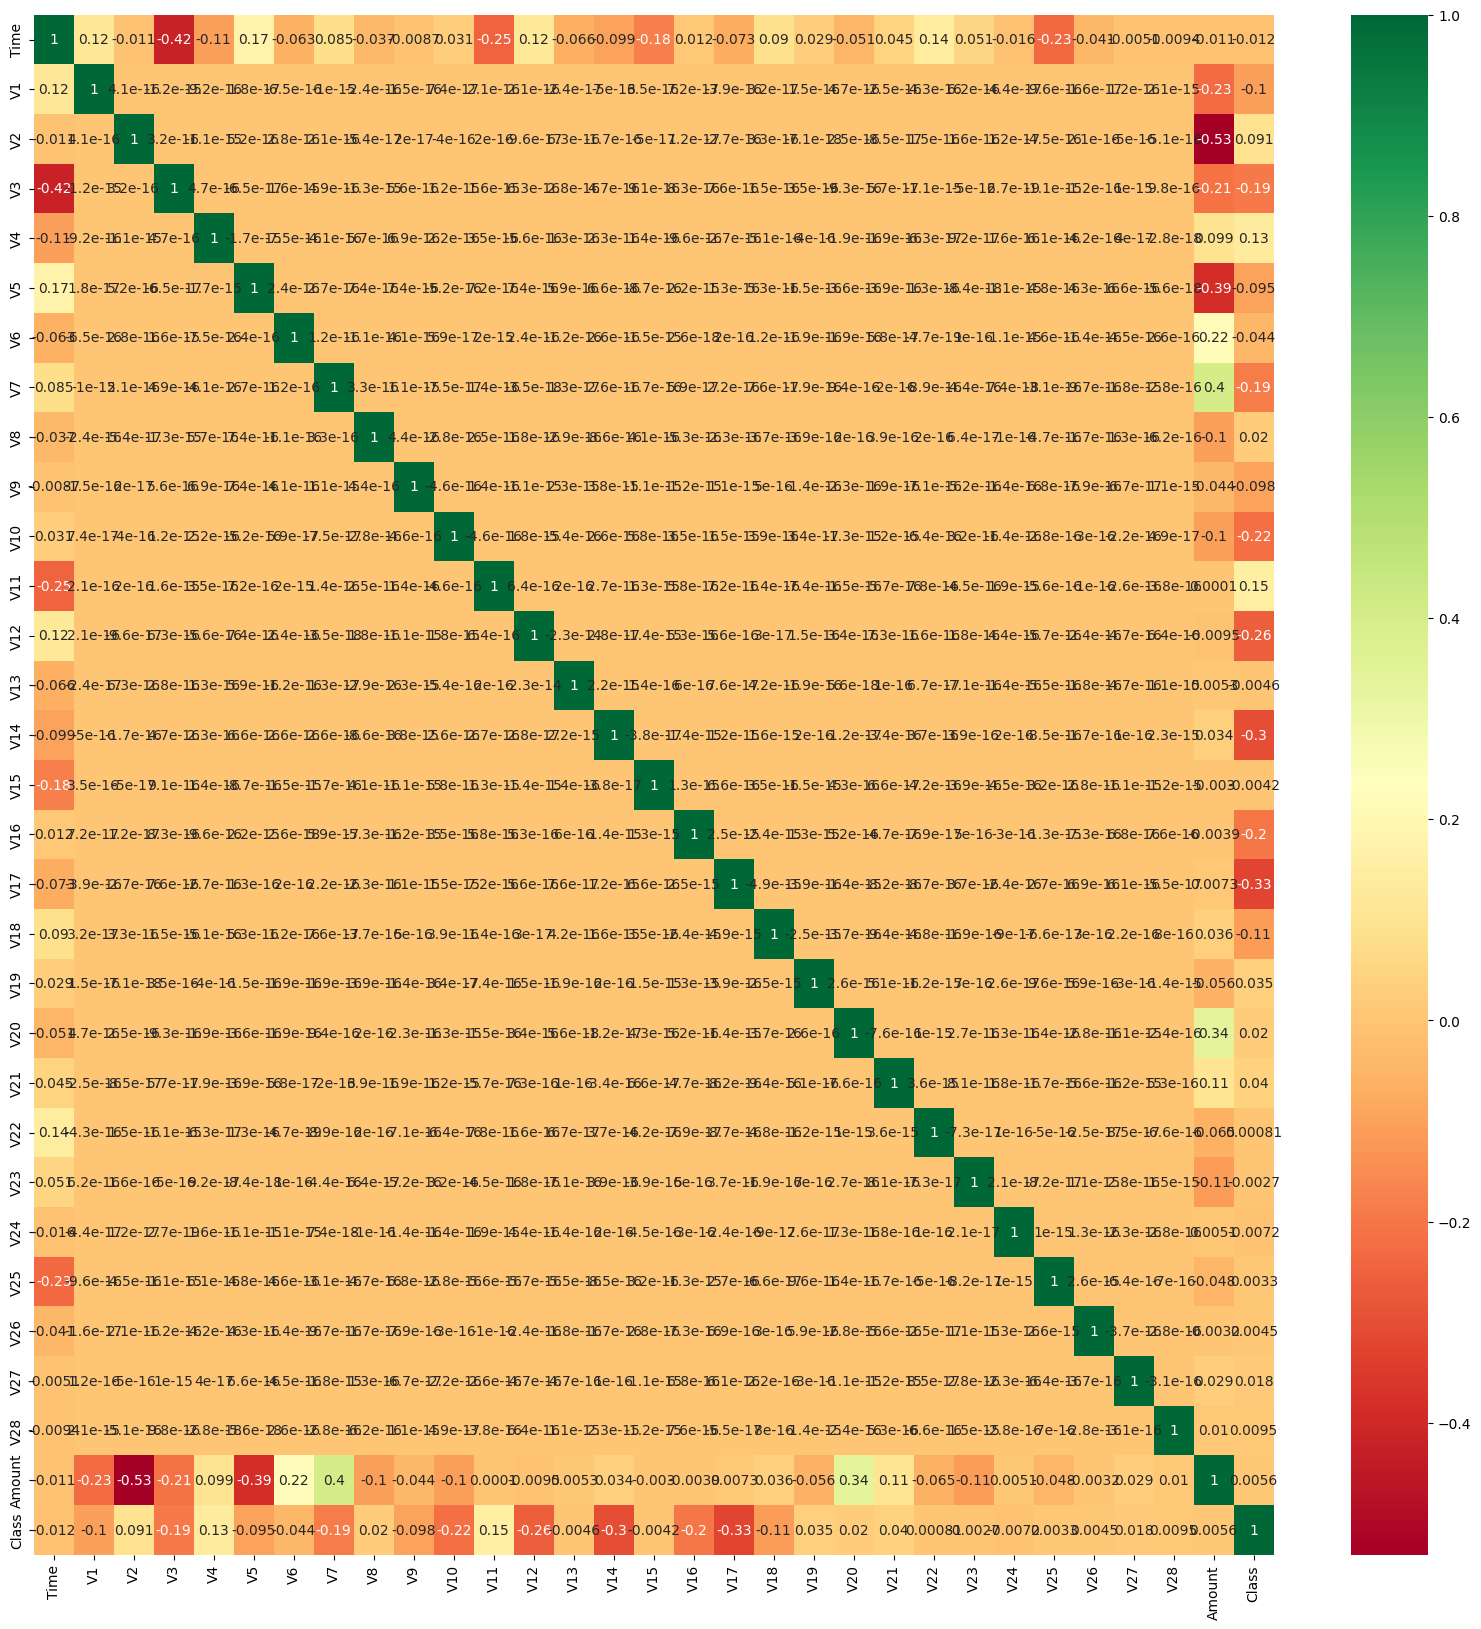

In [ ]:
## Correlation
import seaborn as sns
#get correlations of each features in dataset
corrmat = data1.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
#Create independent and Dependent Features
columns = data1.columns.tolist()
# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Class"]]
# Store the variable we are predicting
target = "Class"
# Define a random state
state = np.random.RandomState(42)
X = data1[columns]
Y = data1[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

(28481, 30)
(28481,)


In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

classifiers = {
    "Isolation Forest": IsolationForest(n_estimators=100,
                                        max_samples=len(X),
                                        contamination=outlier_fraction,
                                        random_state=state,
                                        verbose=0),
    "Local Outlier Factor": LocalOutlierFactor(n_neighbors=20,
                                               algorithm='auto',
                                               leaf_size=30,
                                               metric='minkowski',
                                               p=2,
                                               metric_params=None,
                                               contamination=outlier_fraction),
    "Support Vector Machine": OneClassSVM(kernel='rbf',
                                          degree=3,
                                          gamma=0.1,
                                          nu=0.05,
                                          max_iter=-1)
}


In [ ]:
type(classifiers)

dict

In [ ]:
n_outliers = len(Fraud)
for i, (clf_name,clf) in enumerate(classifiers.items()):
    #Fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_prediction = clf.negative_outlier_factor_
    elif clf_name == "Support Vector Machine":
        clf.fit(X)
        y_pred = clf.predict(X)
    else:
        clf.fit(X)
        scores_prediction = clf.decision_function(X)
        y_pred = clf.predict(X)
    #Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != Y).sum()
    # Run Classification Metrics
    print("{}: {}".format(clf_name,n_errors))
    print("Accuracy Score :")
    print(accuracy_score(Y,y_pred))
    print("Classification Report :")
    print(classification_report(Y,y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Isolation Forest: 73
Accuracy Score :
0.9974368877497279
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.26      0.27      0.26        49

    accuracy                           1.00     28481
   macro avg       0.63      0.63      0.63     28481
weighted avg       1.00      1.00      1.00     28481

Local Outlier Factor: 97
Accuracy Score :
0.9965942207085425
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.02      0.02      0.02        49

    accuracy                           1.00     28481
   macro avg       0.51      0.51      0.51     28481
weighted avg       1.00      1.00      1.00     28481

Support Vector Machine: 8516
Accuracy Score :
0.7009936448860644
Classification Report :
              precision    recall  f1-score   support

           0       1.00      0.70   

**Observations :**

*   
Isolation Forest detected 73 errors versus Local Outlier Factor detecting 97 errors vs. SVM detecting 8516 errors
*   Isolation Forest has a 99.74% more accurate than LOF of 99.65% and SVM of 70.09


*   When comparing error precision & recall for 3 models , the Isolation Forest performed much better than the LOF as we can see that the detection of fraud cases is around 27 % versus LOF detection rate of just 2 % and SVM of 0%
*   So overall Isolation Forest Method performed much better in determining the fraud cases which is around 30%.

*  We can also improve on this accuracy by increasing the sample size or use deep learning algorithms however at the cost of computational expense.We can also use complex anomaly detection models to get better accuracy in determining more fraudulent cases








# XG BOOST

XGBoost is a powerful ensemble learning algorithm that combines multiple weak learners, typically decision trees, in a boosting framework. It has gained widespread popularity due to its exceptional performance, scalability, and ability to handle various data types and distributions.


XGBoost is an implementation of the gradient boosting algorithm, which is an ensemble learning technique that combines multiple weak learners, typically decision trees, to create a strong predictive model. The algorithm works in an iterative manner, where each successive tree in the ensemble is trained to correct the errors made by the previous trees.
In the context of outlier detection, XGBoost treats the problem as a binary classification task, where the goal is to separate the normal instances from the outliers. The algorithm follows these general steps:


Initialization: XGBoost starts with a base model, which can be a single decision tree or a constant value, depending on the configuration.


Residual Calculation: For each instance in the training data, the algorithm calculates the residual, which is the difference between the actual label (normal or outlier) and the prediction made by the current model.


Fitting New Trees: A new decision tree is constructed to fit the residuals from the previous step. The tree aims to capture the patterns in the residuals, effectively learning the errors made by the current model.


Additive Boosting: The new decision tree is added to the ensemble with a weight determined by a learning rate parameter. This ensures that the new tree contributes to the overall model without completely overriding the previous trees.


Iteration: Steps 2-4 are repeated for a predetermined number of iterations or until a stopping criterion is met (e.g., maximum depth of trees, early stopping based on a validation set).







During the training process, XGBoost employs several techniques to improve its performance and prevent overfitting:
Regularization: XGBoost incorporates L1 and L2 regularization terms in the objective function, which helps to control the complexity of the individual trees and prevent overfitting.
Tree Pruning: XGBoost can automatically prune the decision trees during the training process, removing splits that do not contribute significantly to the objective function. This helps to reduce the complexity of the trees and improve generalization.
Feature Subsampling and Column Subsampling: XGBoost can randomly subsample the features and columns during the tree construction process, which introduces randomness and reduces the correlation between the trees in the ensemble.



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import numpy as np
import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data= "/content/drive/MyDrive/creditcard.csv"
df = pd.read_csv(data)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/creditcard.csv'

Non Fraud %  99.83
Fraud %     0.17


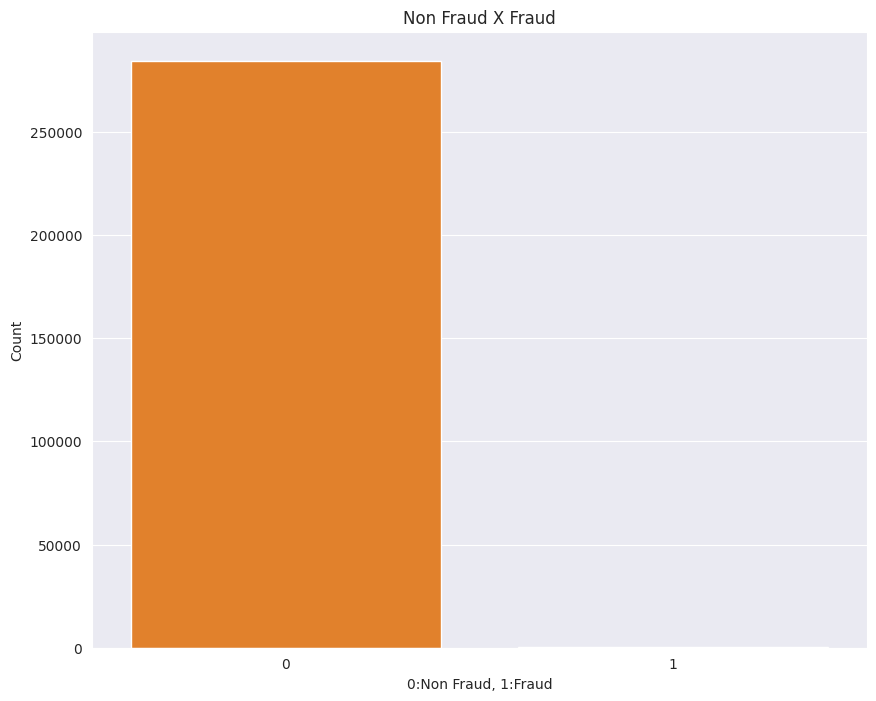

In [ ]:
plt.figure(figsize=(10,8))
sns.set_style('darkgrid')
sns.barplot(x=df['Class'].value_counts().index,y=df['Class'].value_counts(), palette=["C1", "C8"])
plt.title('Non Fraud X Fraud')
plt.ylabel('Count')
plt.xlabel('0:Non Fraud, 1:Fraud')
print ('Non Fraud % ',round(df['Class'].value_counts()[0]/len(df)*100,2))
print ('Fraud %    ',round(df['Class'].value_counts()[1]/len(df)*100,2))

In [ ]:
feature_names = df.iloc[:, 1:30].columns
target = df.iloc[:1, 30:].columns


data_features = df[feature_names]
data_target = df[target]

In [ ]:
from sklearn.model_selection import train_test_split
np.random.seed(123)
X_train, X_test, y_train, y_test = train_test_split(data_features, data_target,
                                                    train_size = 0.70, test_size = 0.30, random_state = 1)

In [ ]:
xg = xgb.XGBClassifier()


The XGBClassifier is an implementation of gradient boosting specifically designed for classification tasks, provided by the XGBoost library. Gradient boosting is an ensemble learning technique that builds a series of decision trees sequentially, where each subsequent tree corrects the errors made by the previous ones.

The XGBClassifier class offers a wide range of parameters to fine-tune the model's behavior and improve its performance. Here's a brief explanation of some of the parameters mentioned in the code snippet:

base_score: The initial prediction score of all instances, which serves as the starting point for the boosting process.
booster: Specifies the type of booster to use (e.g., 'gbtree' for tree-based models or 'gblinear' for linear models).
learning_rate: Controls the step size at each iteration of boosting, influencing the contribution of each tree to the final ensemble.
max_depth: The maximum depth of each decision tree in the ensemble, limiting its complexity and preventing overfitting.
n_estimators: The number of trees in the ensemble, representing the number of boosting rounds.
random_state: Seed for random number generation to ensure reproducibility of results.
eval_metric: The evaluation metric used to assess model performance during training.
early_stopping_rounds: Stops training early if the evaluation metric does not improve for a certain number of rounds.

In [ ]:
xg.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
def PrintStats(cmat, y_test, pred):
    tpos = cmat[0][0]
    fneg = cmat[1][1]
    fpos = cmat[0][1]
    tneg = cmat[1][0]

In [ ]:
def RunModel(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train.values.ravel())
    pred = model.predict(X_test)
    matrix = confusion_matrix(y_test, pred)
    return matrix, pred

In [ ]:
cmat, pred = RunModel(xg, X_train, y_train, X_test, y_test)

In [ ]:
accuracy_score(y_test, pred)

0.9995786664794073

In [ ]:
print (classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.95      0.78      0.85       135

    accuracy                           1.00     85443
   macro avg       0.97      0.89      0.93     85443
weighted avg       1.00      1.00      1.00     85443



With the XGBoost Model, we have
85297 transactions classified as normal and were actually normal;
With the XGBoost Model, we have:

34 transactions classified as normal but which were fraud (type 2 error)
101 transactions classified as fraud and were actually fraud.
11 transactions classified as fraud but that were really normal (type 1 error);
Thus, although the accuracy was excellent, the algorithm wrongly classified about 3 out of 10 fraudulent transactions.

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_features, data_target,
                                                    train_size = 0.70, test_size = 0.30, random_state = 1)
def RunModelWithTuning(model, param_grid, X_train, y_train, X_test, y_test):
    # Initialize GridSearchCV with cross-validation
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

    # Fit the grid search to the data
    grid_search.fit(X_train, y_train)

    # Get the best parameters and best score
    best_params = grid_search.best_params_

    # Initialize XGBoost classifier with the best parameters
    best_xgb = XGBClassifier(**best_params)

    # Fit the model with the best parameters
    best_xgb.fit(X_train, y_train)

    # Make predictions on the test set
    pred = best_xgb.predict(X_test)

    # Print the classification report
    print(classification_report(y_test, pred))

    # Return the best parameters and predictions
    return best_params, pred

# Define the parameter grid
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300],
}

# Initialize XGBoost classifier
xgb = XGBClassifier()

# Run the model with hyperparameter tuning
best_params, pred = RunModelWithTuning(xgb, param_grid, X_train, y_train, X_test, y_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, pred)
print("Accuracy:", accuracy)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.95      0.76      0.84       135

    accuracy                           1.00     85443
   macro avg       0.98      0.88      0.92     85443
weighted avg       1.00      1.00      1.00     85443

Accuracy: 0.9995552590615966
